In [1]:
# computation packages
import numpy as np
import pandas as pd
from math import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
def MAPE(actual, predicted):
    return np.mean(np.abs(actual-predicted)/actual)

In [3]:
stock =  pd.read_csv("finalizedDataset.csv")


In [4]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock = stock.drop(columns=['Unnamed: 0', 'Price_Log_Return'])

In [5]:
train = stock.loc[stock['Date'] < "2022-12-01"]
test =  stock.loc[stock['Date'] >= "2023-01-23"]

In [6]:
train.set_index('Date', inplace=True)
test.set_index('Date', inplace=True)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34958D+00    |proj g|=  1.09478D-01

At iterate    5    f=  2.27144D+00    |proj g|=  6.88752D-02

At iterate   10    f=  2.26274D+00    |proj g|=  1.65247D-02

At iterate   15    f=  2.25591D+00    |proj g|=  2.50342D-03

At iterate   20    f=  2.25386D+00    |proj g|=  1.24149D-02

At iterate   25    f=  2.25329D+00    |proj g|=  4.20023D-04

At iterate   30    f=  2.25310D+00    |proj g|=  4.03329D-03

At iterate   35    f=  2.25300D+00    |proj g|=  6.18697D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

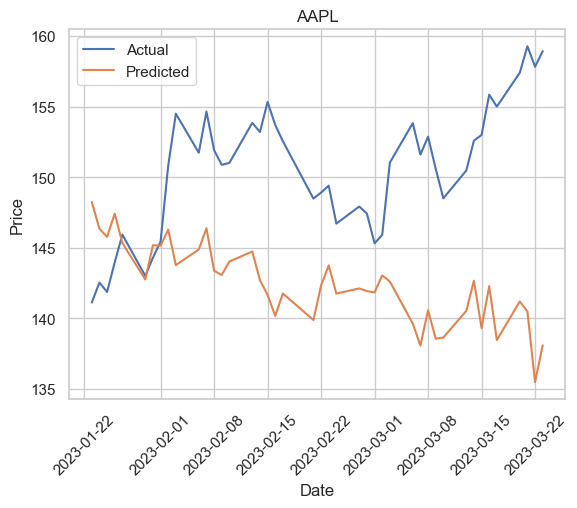

MAPE = 5.90%


In [7]:
# AAPL
Apple_train = train.loc[train['Ticker']=='AAPL'].drop(columns=['Ticker'])
Apple_test = test.loc[test['Ticker']=='AAPL'].drop(columns=['Ticker'])

exog_vars = ['^GSPC', '^TNX', 'polarity_score']
Apple_exog = Apple_train[exog_vars]
model = SARIMAX(Apple_train['Price_Stock'], exog=Apple_exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
exog_test = Apple_test[exog_vars]
predictions = results.get_forecast(steps=len(Apple_test), exog=exog_test)
predicted_stock_prices = predictions.predicted_mean

# Plot actual values
plt.plot(Apple_test.index, Apple_test['Price_Stock'], label='Actual')

# Plot predicted values
plt.plot(Apple_test.index, predicted_stock_prices, label='Predicted')
plt.xticks(rotation=45)
# Add axis labels and legend
plt.title('AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

print("MAPE = {:0.2%}".format(MAPE(Apple_test.Price_Stock.values, predicted_stock_prices)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47832D+00    |proj g|=  2.97408D-02

At iterate    5    f=  3.41919D+00    |proj g|=  6.46066D-03


 This problem is unconstrained.



At iterate   10    f=  3.41690D+00    |proj g|=  8.21118D-04

At iterate   15    f=  3.41572D+00    |proj g|=  4.36329D-03

At iterate   20    f=  3.41220D+00    |proj g|=  1.34089D-03

At iterate   25    f=  3.41215D+00    |proj g|=  2.32095D-04

At iterate   30    f=  3.41192D+00    |proj g|=  1.28632D-03

At iterate   35    f=  3.41169D+00    |proj g|=  5.32420D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     42      1     0     0   5.435D-06   3.412D+00
  F =   3.4116905930620662     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


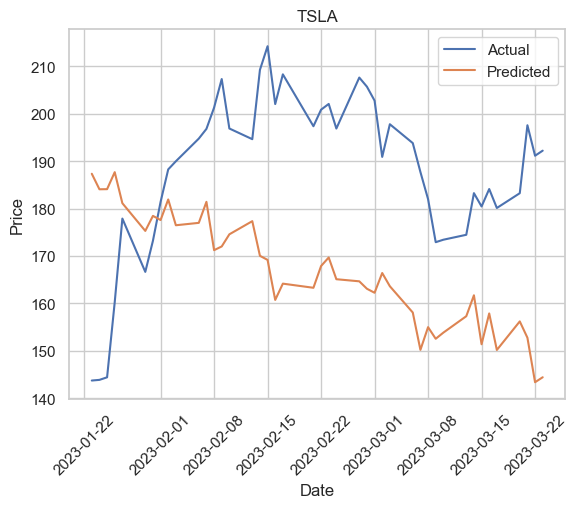

MAPE = 15.47%


In [8]:
# TSLA
Tesla_train = train.loc[train['Ticker']=='TSLA'].drop(columns=['Ticker'])
Tesla_test = test.loc[test['Ticker']=='TSLA'].drop(columns=['Ticker'])

exog_vars = ['^GSPC', '^TNX', 'polarity_score']
Tesla_exog = Tesla_train[exog_vars]
model = SARIMAX(Tesla_train['Price_Stock'], exog=Tesla_exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
exog_test = Tesla_test[exog_vars]
predictions = results.get_forecast(steps=len(Tesla_test), exog=exog_test)
predicted_stock_prices = predictions.predicted_mean

# Plot actual values
plt.plot(Tesla_test.index, Tesla_test['Price_Stock'], label='Actual')

# Plot predicted values
plt.plot(Tesla_test.index, predicted_stock_prices, label='Predicted')
plt.xticks(rotation=45)
# Add axis labels and legend
plt.title('TSLA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

print("MAPE = {:0.2%}".format(MAPE(Tesla_test.Price_Stock.values, predicted_stock_prices)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13529D+00    |proj g|=  3.82744D-01


 This problem is unconstrained.



At iterate    5    f=  1.07011D+00    |proj g|=  4.02151D-02

At iterate   10    f=  1.06677D+00    |proj g|=  2.72854D-03

At iterate   15    f=  1.06521D+00    |proj g|=  3.90787D-03

At iterate   20    f=  1.06419D+00    |proj g|=  1.40778D-02

At iterate   25    f=  1.06397D+00    |proj g|=  2.52741D-03

At iterate   30    f=  1.06375D+00    |proj g|=  7.79097D-03

At iterate   35    f=  1.06368D+00    |proj g|=  9.16118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     42      1     0     0   9.161D-06   1.064D+00
  F =   1.0636774650390235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

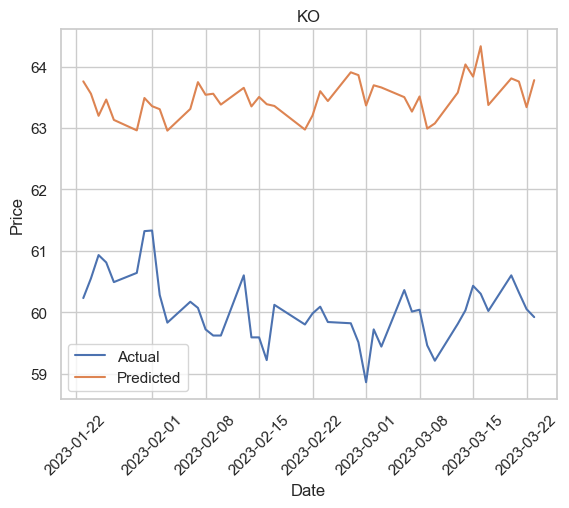

MAPE = 5.72%


In [9]:
# KO
KO_train = train.loc[train['Ticker']=='KO'].drop(columns=['Ticker'])
KO_test = test.loc[test['Ticker']=='KO'].drop(columns=['Ticker'])

exog_vars = ['^GSPC', '^TNX', 'polarity_score']
KO_exog = KO_train[exog_vars]
model = SARIMAX(KO_train['Price_Stock'], exog=KO_exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
exog_test = KO_test[exog_vars]
predictions = results.get_forecast(steps=len(KO_test), exog=exog_test)
predicted_stock_prices = predictions.predicted_mean

# Plot actual values
plt.plot(KO_test.index, KO_test['Price_Stock'], label='Actual')

# Plot predicted values
plt.plot(KO_test.index, predicted_stock_prices, label='Predicted')
plt.xticks(rotation=45)
# Add axis labels and legend
plt.title('KO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

print("MAPE = {:0.2%}".format(MAPE(KO_test.Price_Stock.values, predicted_stock_prices)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08671D+00    |proj g|=  1.42311D-01


 This problem is unconstrained.



At iterate    5    f=  2.00818D+00    |proj g|=  2.43990D-02

At iterate   10    f=  1.99422D+00    |proj g|=  3.21309D-03

At iterate   15    f=  1.98990D+00    |proj g|=  9.99617D-04

At iterate   20    f=  1.98768D+00    |proj g|=  3.29866D-02

At iterate   25    f=  1.98665D+00    |proj g|=  1.35705D-03

At iterate   30    f=  1.98661D+00    |proj g|=  8.07339D-04

At iterate   35    f=  1.98657D+00    |proj g|=  2.36084D-03

At iterate   40    f=  1.98629D+00    |proj g|=  2.55428D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     51      1     0     0   1.904D-05   1.986D+00
  F =   1.98629082820

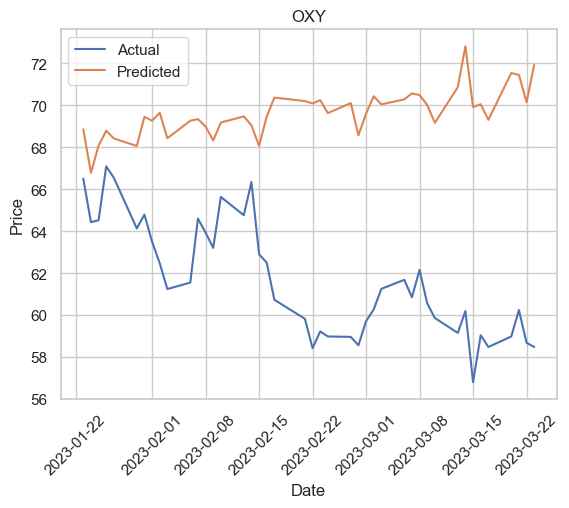

MAPE = 13.19%


In [10]:
# OXY
OXY_train = train.loc[train['Ticker']=='OXY'].drop(columns=['Ticker'])
OXY_test = test.loc[test['Ticker']=='OXY'].drop(columns=['Ticker'])

exog_vars = ['^GSPC', '^TNX', 'polarity_score']
OXY_exog = OXY_train[exog_vars]
model = SARIMAX(OXY_train['Price_Stock'], exog=OXY_exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
exog_test = OXY_test[exog_vars]
predictions = results.get_forecast(steps=len(OXY_test), exog=exog_test)
predicted_stock_prices = predictions.predicted_mean

# Plot actual values
plt.plot(OXY_test.index, OXY_test['Price_Stock'], label='Actual')

# Plot predicted values
plt.plot(OXY_test.index, predicted_stock_prices, label='Predicted')
plt.xticks(rotation=45)
# Add axis labels and legend
plt.title('OXY')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

print("MAPE = {:0.2%}".format(MAPE(OXY_test.Price_Stock.values, predicted_stock_prices)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00174D+00    |proj g|=  5.42611D-01


 This problem is unconstrained.



At iterate    5    f=  9.05469D-01    |proj g|=  1.07407D-02

At iterate   10    f=  8.96934D-01    |proj g|=  5.30284D-02

At iterate   15    f=  8.95763D-01    |proj g|=  1.79106D-02

At iterate   20    f=  8.95370D-01    |proj g|=  1.41532D-03

At iterate   25    f=  8.95360D-01    |proj g|=  1.35046D-03

At iterate   30    f=  8.95209D-01    |proj g|=  2.41907D-03

At iterate   35    f=  8.95188D-01    |proj g|=  5.64607D-04

At iterate   40    f=  8.95133D-01    |proj g|=  1.83094D-03

At iterate   45    f=  8.95097D-01    |proj g|=  8.95370D-04

At iterate   50    f=  8.95085D-01    |proj g|=  2.43811D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

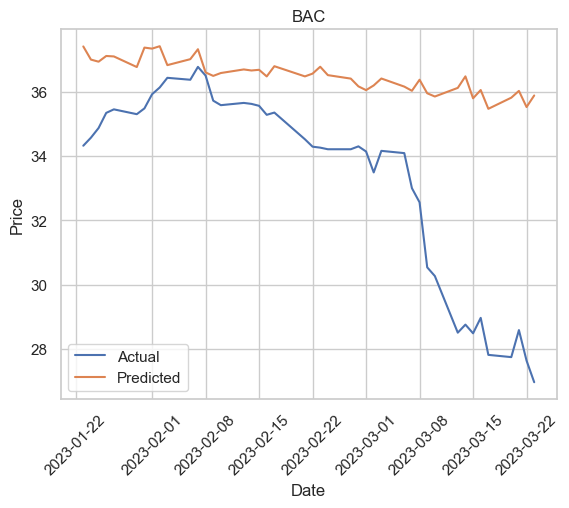

MAPE = 10.32%


In [11]:
# BAC
BAC_train = train.loc[train['Ticker']=='BAC'].drop(columns=['Ticker'])
BAC_test = test.loc[test['Ticker']=='BAC'].drop(columns=['Ticker'])

exog_vars = ['^GSPC', '^TNX', 'polarity_score']
BAC_exog = BAC_train[exog_vars]
model = SARIMAX(BAC_train['Price_Stock'], exog=BAC_exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
exog_test = BAC_test[exog_vars]
predictions = results.get_forecast(steps=len(BAC_test), exog=exog_test)
predicted_stock_prices = predictions.predicted_mean

# Plot actual values
plt.plot(BAC_test.index, BAC_test['Price_Stock'], label='Actual')

# Plot predicted values
plt.plot(BAC_test.index, predicted_stock_prices, label='Predicted')
plt.xticks(rotation=45)
# Add axis labels and legend
plt.title('BAC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

print("MAPE = {:0.2%}".format(MAPE(BAC_test.Price_Stock.values, predicted_stock_prices)))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15993D+00    |proj g|=  1.27004D-01

At iterate    5    f=  2.08271D+00    |proj g|=  1.46551D-02

At iterate   10    f=  2.07927D+00    |proj g|=  7.89785D-03

At iterate   15    f=  2.07838D+00    |proj g|=  1.20530D-03

At iterate   20    f=  2.07730D+00    |proj g|=  3.28190D-03

At iterate   25    f=  2.07701D+00    |proj g|=  9.44172D-05

At iterate   30    f=  2.07700D+00    |proj g|=  6.49539D-04

At iterate   35    f=  2.07698D+00    |proj g|=  5.54976D-04

At iterate   40    f=  2.07698D+00    |proj g|=  5.32939D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

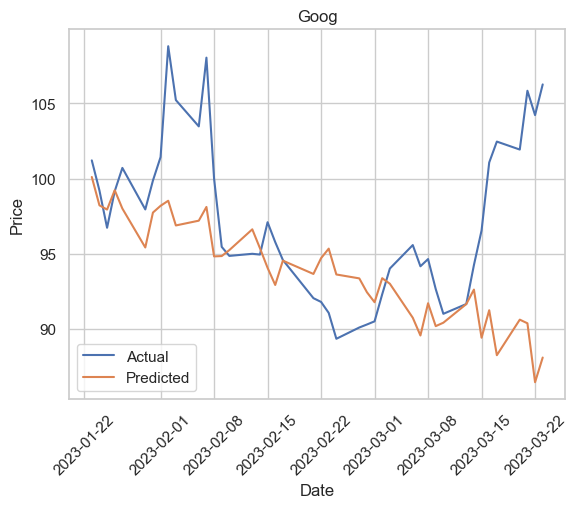

MAPE = 4.51%


In [7]:
# GOOG
Goog_train = train.loc[train['Ticker']=='GOOG'].drop(columns=['Ticker'])
Goog_test = test.loc[test['Ticker']=='GOOG'].drop(columns=['Ticker'])

exog_vars = ['^GSPC', '^TNX', 'polarity_score']
Goog_exog = Goog_train[exog_vars]
model = SARIMAX(Goog_train['Price_Stock'], exog=Goog_exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
exog_test = Goog_test[exog_vars]
predictions = results.get_forecast(steps=len(Goog_test), exog=exog_test)
predicted_stock_prices = predictions.predicted_mean

# Plot actual values
plt.plot(Goog_test.index, Goog_test['Price_Stock'], label='Actual')

# Plot predicted values
plt.plot(Goog_test.index, predicted_stock_prices, label='Predicted')
plt.xticks(rotation=45)
# Add axis labels and legend
plt.title('Goog')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

print("MAPE = {:0.2%}".format(MAPE(Goog_test.Price_Stock.values, predicted_stock_prices)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00174D+00    |proj g|=  5.42611D-01

At iterate    5    f=  9.05469D-01    |proj g|=  1.07407D-02


 This problem is unconstrained.



At iterate   10    f=  8.96934D-01    |proj g|=  5.30284D-02

At iterate   15    f=  8.95763D-01    |proj g|=  1.79106D-02

At iterate   20    f=  8.95370D-01    |proj g|=  1.41532D-03

At iterate   25    f=  8.95360D-01    |proj g|=  1.35046D-03

At iterate   30    f=  8.95209D-01    |proj g|=  2.41907D-03

At iterate   35    f=  8.95188D-01    |proj g|=  5.64607D-04

At iterate   40    f=  8.95133D-01    |proj g|=  1.83094D-03

At iterate   45    f=  8.95097D-01    |proj g|=  8.95370D-04

At iterate   50    f=  8.95085D-01    |proj g|=  2.43811D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

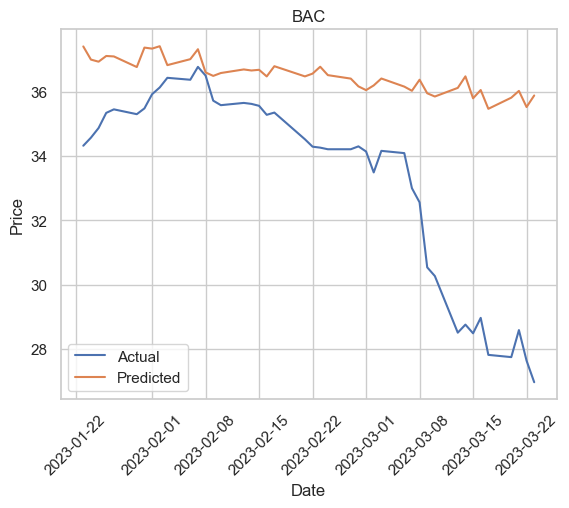

MAPE = 10.32%


In [8]:
# BAC
BAC_train = train.loc[train['Ticker']=='BAC'].drop(columns=['Ticker'])
BAC_test = test.loc[test['Ticker']=='BAC'].drop(columns=['Ticker'])

exog_vars = ['^GSPC', '^TNX', 'polarity_score']
BAC_exog = BAC_train[exog_vars]
model = SARIMAX(BAC_train['Price_Stock'], exog=BAC_exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
exog_test = BAC_test[exog_vars]
predictions = results.get_forecast(steps=len(BAC_test), exog=exog_test)
predicted_stock_prices = predictions.predicted_mean

# Plot actual values
plt.plot(BAC_test.index, BAC_test['Price_Stock'], label='Actual')

# Plot predicted values
plt.plot(BAC_test.index, predicted_stock_prices, label='Predicted')
plt.xticks(rotation=45)
# Add axis labels and legend
plt.title('BAC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

print("MAPE = {:0.2%}".format(MAPE(BAC_test.Price_Stock.values, predicted_stock_prices)))